<a href="https://colab.research.google.com/github/Collen2021/Data-Engineering-projects/blob/main/Machine_Learning_Models_Fire_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning model 1 -

## Importing the data

In [1]:
import pandas as pd

In [12]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import pandas as pd

# Replace 'your-file-path.csv' with the actual path to the file

#file_path = 'https://drive.google.com/file/d/1YfDxRrZ_YCQugxPIz1yY5qH6tK1BQ2kl/view?usp=drive_link'

file_path = '/content/drive/My Drive/Colab Notebooks/Project 1 - Machine Learning/fire_prediction_dataset.csv'


In [18]:
df = pd.read_csv(file_path, encoding='latin-1')

## Exploratory Data Analysis

In [19]:
# @title Head
df.head()

,Index,Timestamp,Temperature (°C),Humidity (%),Wind Speed (km/h),Smoke Density (ppm),Vegetation Dryness Index,Rainfall (mm),Fire Likelihood (0/1)
0,1,1/1/2024 0:00,27.137324,59.471093,37.620023,272.235391,0.358578,15.402419,1
1,2,1/1/2024 1:00,38.727275,70.300924,8.762298,275.860083,0.768201,15.285415,1
2,3,1/1/2024 2:00,13.698052,23.205502,32.894957,168.464473,0.068155,2.152531,1
3,4,1/1/2024 3:00,31.545360,56.838001,19.345715,182.144896,0.696190,14.235452,1
4,5,1/1/2024 4:00,26.107251,26.692994,16.608054,137.578946,0.624002,10.579114,1


In [20]:
# @title Tail
df.tail()

,Index,Timestamp,Temperature (°C),Humidity (%),Wind Speed (km/h),Smoke Density (ppm),Vegetation Dryness Index,Rainfall (mm),Fire Likelihood (0/1)
1995,1996,3/24/2024 3:00,23.347600,13.876165,22.254394,14.670472,0.646612,5.441080,0
1996,1997,3/24/2024 4:00,48.853992,10.854382,7.319259,113.314631,0.209804,17.218716,1
1997,1998,3/24/2024 5:00,47.377120,60.888817,19.694229,7.952227,0.366378,9.873329,0
1998,1999,3/24/2024 6:00,15.383044,40.074167,77.278063,260.171098,0.575256,15.570071,1
1999,2000,3/24/2024 7:00,25.568730,87.342987,28.764072,43.939171,0.283850,2.785279,0


In [21]:
df2 = df.drop(['Index', 'Timestamp'], axis = 1, errors = 'ignore')

                          Temperature (°C)  Humidity (%)  Wind Speed (km/h)  \
Temperature (°C)                  1.000000      0.020002          -0.015309   
Humidity (%)                      0.020002      1.000000          -0.014414   
Wind Speed (km/h)                -0.015309     -0.014414           1.000000   
Smoke Density (ppm)               0.075612      0.009062          -0.011369   
Vegetation Dryness Index         -0.012379     -0.001752           0.067039   
Rainfall (mm)                    -0.005995      0.008090          -0.020408   
Fire Likelihood (0/1)             0.251869      0.014449          -0.047821   

                          Smoke Density (ppm)  Vegetation Dryness Index  \
Temperature (°C)                     0.075612                 -0.012379   
Humidity (%)                         0.009062                 -0.001752   
Wind Speed (km/h)                   -0.011369                  0.067039   
Smoke Density (ppm)                  1.000000                  0.00

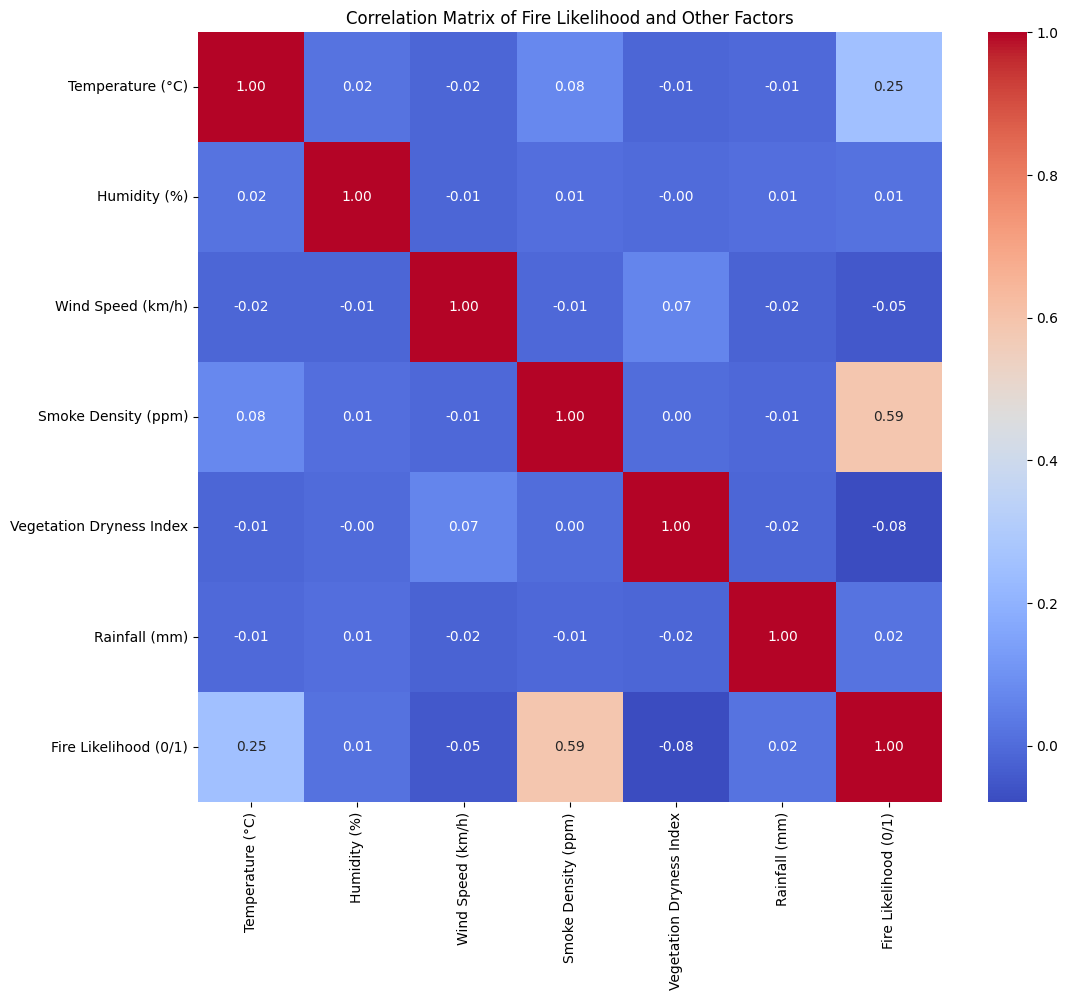

In [22]:
# Calculate the correlation matrix
correlation_matrix = df2.corr()

# Print the correlation matrix
print(correlation_matrix)

# You can also visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Fire Likelihood and Other Factors')
plt.show()

## Data visualization

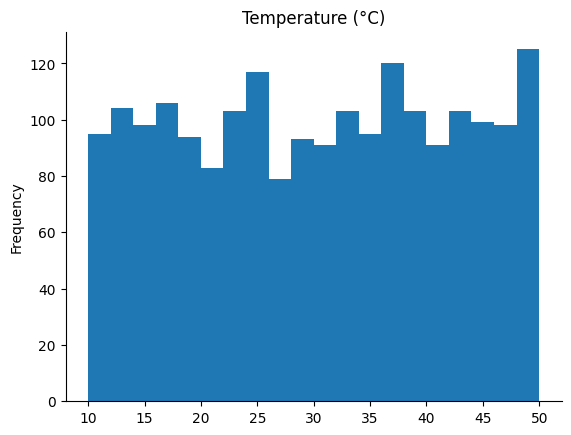

In [23]:
# @title Temperature (°C)

from matplotlib import pyplot as plt
df['Temperature (°C)'].plot(kind='hist', bins=20, title='Temperature (°C)')
plt.gca().spines[['top', 'right',]].set_visible(False)

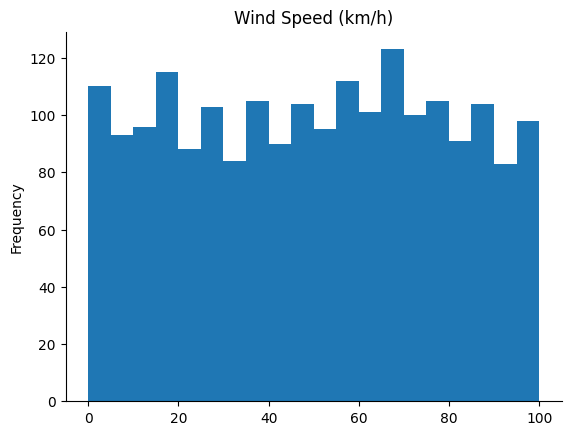

In [24]:
# @title Wind Speed (km/h)

from matplotlib import pyplot as plt
df['Wind Speed (km/h)'].plot(kind='hist', bins=20, title='Wind Speed (km/h)')
plt.gca().spines[['top', 'right',]].set_visible(False)

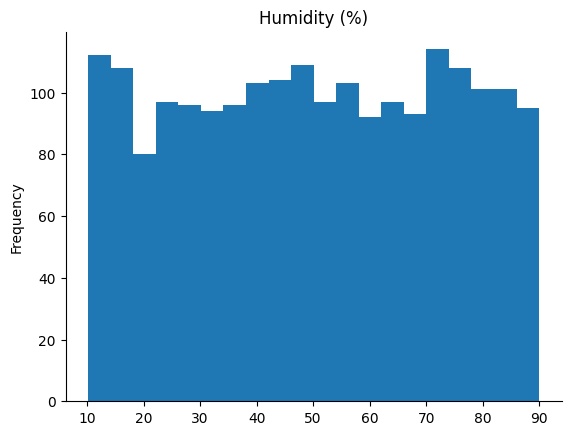

In [25]:
# @title Humidity (%)

from matplotlib import pyplot as plt
df['Humidity (%)'].plot(kind='hist', bins=20, title='Humidity (%)')
plt.gca().spines[['top', 'right',]].set_visible(False)

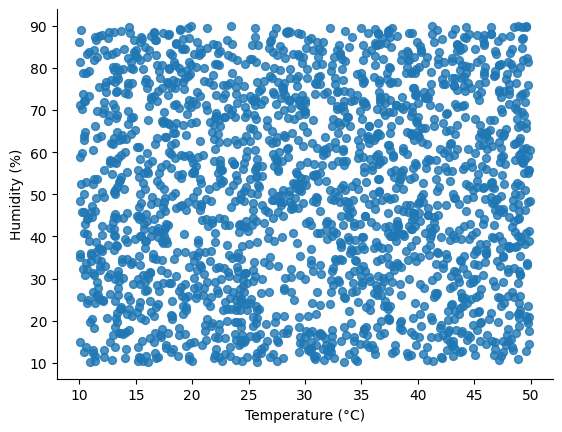

In [26]:
# @title Temperature (°C) vs Humidity (%)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Temperature (°C)', y='Humidity (%)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

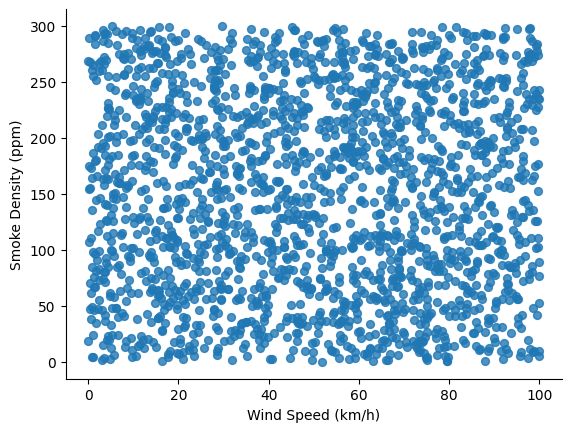

In [27]:
# @title Wind Speed (km/h) vs Smoke Density (ppm)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Wind Speed (km/h)', y='Smoke Density (ppm)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [30]:
df2.head()

,Temperature (°C),Humidity (%),Wind Speed (km/h),Smoke Density (ppm),Vegetation Dryness Index,Rainfall (mm),Fire Likelihood (0/1)
0,27.137324,59.471093,37.620023,272.235391,0.358578,15.402419,1
1,38.727275,70.300924,8.762298,275.860083,0.768201,15.285415,1
2,13.698052,23.205502,32.894957,168.464473,0.068155,2.152531,1
3,31.545360,56.838001,19.345715,182.144896,0.696190,14.235452,1
4,26.107251,26.692994,16.608054,137.578946,0.624002,10.579114,1


In [33]:
df2.columns

Index(['Temperature (°C)', 'Humidity (%)', 'Wind Speed (km/h)',
       'Smoke Density (ppm)', 'Vegetation Dryness Index', 'Rainfall (mm)',
       'Fire Likelihood (0/1)'],
      dtype='object')

## **Model building**

### Model 1 - Naive Bayes

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'Fire' is the target variable and other columns are features
X = df2.drop('Fire Likelihood (0/1)', axis=1)
y = df2['Fire Likelihood (0/1)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.815
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       131
           1       0.85      0.87      0.86       269

    accuracy                           0.81       400
   macro avg       0.79      0.78      0.79       400
weighted avg       0.81      0.81      0.81       400

[[ 91  40]
 [ 34 235]]


### Model 2 : Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
log_model = LogisticRegression(max_iter=1000)  # Increased max_iter
log_model.fit(X_train, y_train)

# Make predictions on the test set
log_y_pred = log_model.predict(X_test)

# Evaluate the model
log_accuracy = accuracy_score(y_test, log_y_pred)
print(f"Logistic Regression Accuracy: {log_accuracy}")

print(classification_report(y_test, log_y_pred))
print(confusion_matrix(y_test, log_y_pred))

Logistic Regression Accuracy: 0.7875
              precision    recall  f1-score   support

           0       0.69      0.63      0.66       131
           1       0.83      0.87      0.85       269

    accuracy                           0.79       400
   macro avg       0.76      0.75      0.75       400
weighted avg       0.78      0.79      0.78       400

[[ 82  49]
 [ 36 233]]


### Model 3 : Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'Fire Likelihood (0/1)' is the target variable and other columns are features
X = df2.drop('Fire Likelihood (0/1)', axis=1)
y = df2['Fire Likelihood (0/1)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test set
linear_y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, linear_y_pred)
r2 = r2_score(y_test, linear_y_pred)

print(f"Linear Regression Mean Squared Error: {mse}")
print(f"Linear Regression R-squared: {r2}")

Linear Regression Mean Squared Error: 0.14122499100688157
Linear Regression R-squared: 0.35877866678676895


### Model 4: Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)  # You can adjust hyperparameters here
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Random Forest Accuracy: {rf_accuracy}")

print(classification_report(y_test, rf_y_pred))
print(confusion_matrix(y_test, rf_y_pred))

Random Forest Accuracy: 0.9475
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       131
           1       0.97      0.96      0.96       269

    accuracy                           0.95       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.95      0.95      0.95       400

[[122   9]
 [ 12 257]]


### Model 5: Support Vector Machine

In [41]:
from sklearn.svm import SVC

# Initialize and train the Support Vector Machine model
svm_model = SVC(random_state=42)  # You can adjust hyperparameters here
svm_model.fit(X_train, y_train)

# Make predictions on the test set
svm_y_pred = svm_model.predict(X_test)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(f"Support Vector Machine Accuracy: {svm_accuracy}")

print(classification_report(y_test, svm_y_pred))
print(confusion_matrix(y_test, svm_y_pred))

Support Vector Machine Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.85      0.66      0.74       131
           1       0.85      0.94      0.89       269

    accuracy                           0.85       400
   macro avg       0.85      0.80      0.82       400
weighted avg       0.85      0.85      0.84       400

[[ 86  45]
 [ 15 254]]


### Model 6: KNN (k Nearest Neighbors)

In [42]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
knn_y_pred = knn_model.predict(X_test)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print(f"KNN Accuracy: {knn_accuracy}")

print(classification_report(y_test, knn_y_pred))
print(confusion_matrix(y_test, knn_y_pred))

KNN Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.78      0.67      0.72       131
           1       0.85      0.91      0.88       269

    accuracy                           0.83       400
   macro avg       0.81      0.79      0.80       400
weighted avg       0.83      0.83      0.83       400

[[ 88  43]
 [ 25 244]]


### Model 7: Decision Trees

In [49]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)  # Adjust hyperparameters here
dt_model.fit(X_train, y_train)

# Make predictions on the test set
dt_y_pred = dt_model.predict(X_test)

# Evaluate the model
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print(f"Decision Tree Accuracy: {dt_accuracy}")

print(classification_report(y_test, dt_y_pred))
print(confusion_matrix(y_test, dt_y_pred))

Decision Tree Accuracy: 0.9375
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       131
           1       0.94      0.97      0.95       269

    accuracy                           0.94       400
   macro avg       0.94      0.92      0.93       400
weighted avg       0.94      0.94      0.94       400

[[114  17]
 [  8 261]]


### Model 8: Boosting Algorithms

In [54]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

#### 8.1 Gradient Boosting Machine

In [55]:
# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_y_pred)
print(f"Gradient Boosting Accuracy: {gb_accuracy}")
print(classification_report(y_test, gb_y_pred))
print(confusion_matrix(y_test, gb_y_pred))

Gradient Boosting Accuracy: 0.955
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       131
           1       0.98      0.96      0.97       269

    accuracy                           0.95       400
   macro avg       0.94      0.95      0.95       400
weighted avg       0.96      0.95      0.96       400

[[125   6]
 [ 12 257]]


#### 8.2 AdaBoost

In [52]:
# AdaBoost
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)
ada_y_pred = ada_model.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_y_pred)
print(f"AdaBoost Accuracy: {ada_accuracy}")
print(classification_report(y_test, ada_y_pred))
print(confusion_matrix(y_test, ada_y_pred))

AdaBoost Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.82      0.58      0.68       131
           1       0.82      0.94      0.88       269

    accuracy                           0.82       400
   macro avg       0.82      0.76      0.78       400
weighted avg       0.82      0.82      0.81       400

[[ 76  55]
 [ 17 252]]


#### 8.3 XGBoost

In [57]:
import xgboost as xgb

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)  # You can adjust hyperparameters here
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
xgb_y_pred = xgb_model.predict(X_test)

# Evaluate the model
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
print(f"XGBoost Accuracy: {xgb_accuracy}")

print(classification_report(y_test, xgb_y_pred))
print(confusion_matrix(y_test, xgb_y_pred))

XGBoost Accuracy: 0.9575
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       131
           1       0.97      0.96      0.97       269

    accuracy                           0.96       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.96      0.96      0.96       400

[[124   7]
 [ 10 259]]


#### 8.4 LightGBM

In [60]:
import lightgbm as lgb

# Initialize and train the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)  # Adjust hyperparameters here
lgb_model.fit(X_train, y_train)

# Make predictions on the test set
lgb_y_pred = lgb_model.predict(X_test)

# Evaluate the model
lgb_accuracy = accuracy_score(y_test, lgb_y_pred)
print(f"LightGBM Accuracy: {lgb_accuracy}")

print(classification_report(y_test, lgb_y_pred))
print(confusion_matrix(y_test, lgb_y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1109, number of negative: 491
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000211 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.693125 -> initscore=0.814770
[LightGBM] [Info] Start training from score 0.814770
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,